### from scipy.special import jacobi
import numpy as np
import matplotlib.pyplot as plt

l=1
t=np.linspace(-1,1,1000)
for n in range(1,100):
    P=jacobi(n,1/2,5/2)
    y=P(t)**2/P(-1)**2*(1+t)**l
    plt.scatter(n,(-y[-1]+y.max())/y.max())

In [1]:
import sympy as sp
from sympy.abc import alpha,beta,x,n

In [10]:
jacobi_pol=sp.jacobi(n,alpha,beta,x)
w=((1+x)**beta)*((1-x)**alpha)
sp.integrate(w*jacobi_pol**2,(x,-1,1))

Integral((1 - x)**alpha*(x + 1)**beta*jacobi(n, alpha, beta, x)**2, (x, -1, 1))

In [6]:
from sympy.integrals.transforms import mellin_transform

inte=sp.besselj(1,x)**2*sp.exp(-x**2/n)#*x**alpha
#sp.integrate(inte,(x,0,sp.inft)
levrai=mellin_transform(inte,x,alpha)
#sp.integrals.

In [14]:
inte

exp(-x**2/n)*besselj(1, x)**2

In [ ]:
sp.latex()

In [15]:
sp.latex(levrai[0])

'\\frac{n^{\\frac{\\alpha}{2} + 1} \\Gamma\\left(\\frac{\\alpha}{2} + 1\\right) {{}_{2}F_{2}\\left(\\begin{matrix} \\frac{3}{2}, \\frac{\\alpha}{2} + 1 \\\\ 2, 3 \\end{matrix}\\middle| {- n} \\right)}}{8}'

## Le experimental table

In [6]:
## jacobi stability
from optim import *
from utils import *
beta_list=[3/2,5/2,10]
methods,tags=[nesterov,cg,gd]+[jm_decorator(1/2,l) for l in beta_list],['nesterov','cg','gd']+[r'Chebyshev $\beta=$'+str(l) for l in beta_list]
logs=[[] for _ in range(len(methods))]
for _ in range(10):
    for m,l in zip(methods,logs):
        f= RandomQuadratic()
        l.append(m(f,niter=600)[0].to_numpy()[0])
logs=[np.stack(l) for l in logs]

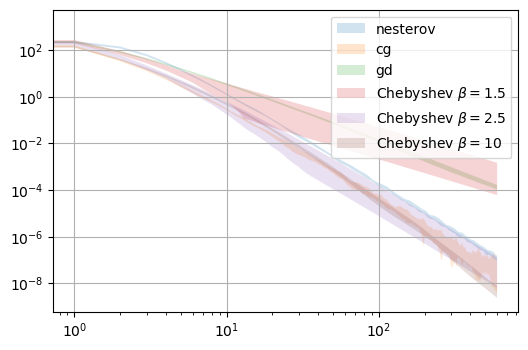

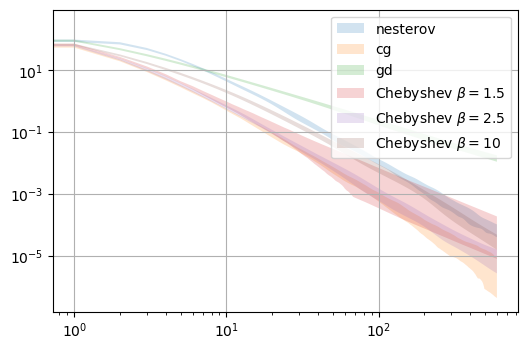

In [7]:
for log_idx in [0,2]:

    plt.figure(dpi=100)

    for a, tag in zip(logs,tags):
        #a=np.log10(a)1
        a=a[:,:,:2000]
        m,std=a.mean(0),a.std(0)
        plt.fill_between(np.arange(a.shape[-1]),np.maximum((m-std)[log_idx],0.1*m[log_idx]),(m+std)[log_idx],alpha=0.2,label=tag)
        #plt.fill_between(np.arange(len(m[log_idx])),a.min(0)[log_idx],a.max(0)[log_idx],alpha=0.2)

        #plt.plot(m[log_idx]*(np.linspace(0,2000,2000)**(3 if log_idx==0 else 5)),label=tag)
    plt.yscale('log')
    plt.xscale('log')
    plt.grid()
    plt.legend()

[[-4.01323089]]
[[-2.68115817]]
[[-3.95963492]]
[[-3.00358156]]
[[-4.92830524]]
[[-2.83320855]]
[[-4.65831935]]
[[-2.83952108]]


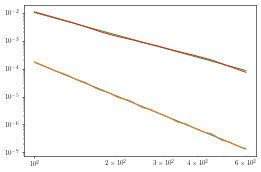

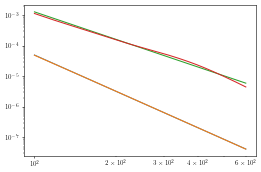

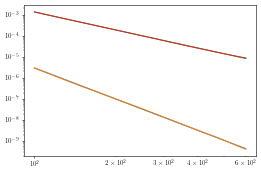

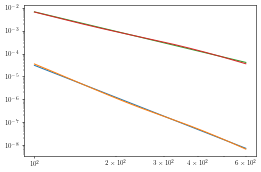

In [203]:
import sklearn
begin_idx=100
for  l in logs:
    plt.figure(dpi=50)
    for log_idx in [0,2]:
        m=l[:,log_idx,begin_idx:].mean(0)
        model=sklearn.linear_model.LinearRegression()
        logx=np.log(np.arange(begin_idx,601).astype(float))
        model.fit(logx[:,None],np.log(m)[:,None])
        plt.plot(np.exp(logx),np.exp(model.predict(logx[:,None])))
        plt.plot(np.exp(logx),m)
        plt.xscale('log')
        plt.yscale('log')
        print(model.coef_)


##The slope is now what we expected
##

## Inception

[[-2.08140504]]
[[-6.49393329]]
[[-4.00859169]]
[[-14.30479138]]
[[-1.07775402]]
[[-3.66909802]]
[[-0.00118222]]


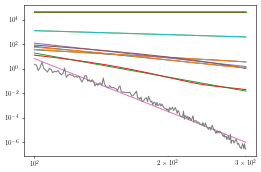

In [250]:
import sklearn
begin_idx=100
plt.figure(dpi=50)
for l in logs:
    m=l[:,0,begin_idx:].mean(0)
    model=sklearn.linear_model.LinearRegression()
    logx=np.log(np.arange(begin_idx,301).astype(float))
    model.fit(logx[:,None],np.log(m)[:,None])
    plt.plot(np.exp(logx),np.exp(model.predict(logx[:,None])))
    plt.plot(np.exp(logx),m)
    plt.xscale('log')
    plt.yscale('log')
    print(model.coef_)


##Higher values of a indeed speedup performance

(3, 300) (3, 300)
(3, 300) (3, 300)
(3, 300) (3, 300)
(3, 300) (3, 300)
(3, 300) (3, 300)
(3, 300) (3, 300)
(3, 300) (3, 300)
(3, 300) (3, 300)
(3, 300) (3, 300)
(3, 300) (3, 300)
(3, 300) (3, 300)
(3, 300) (3, 300)


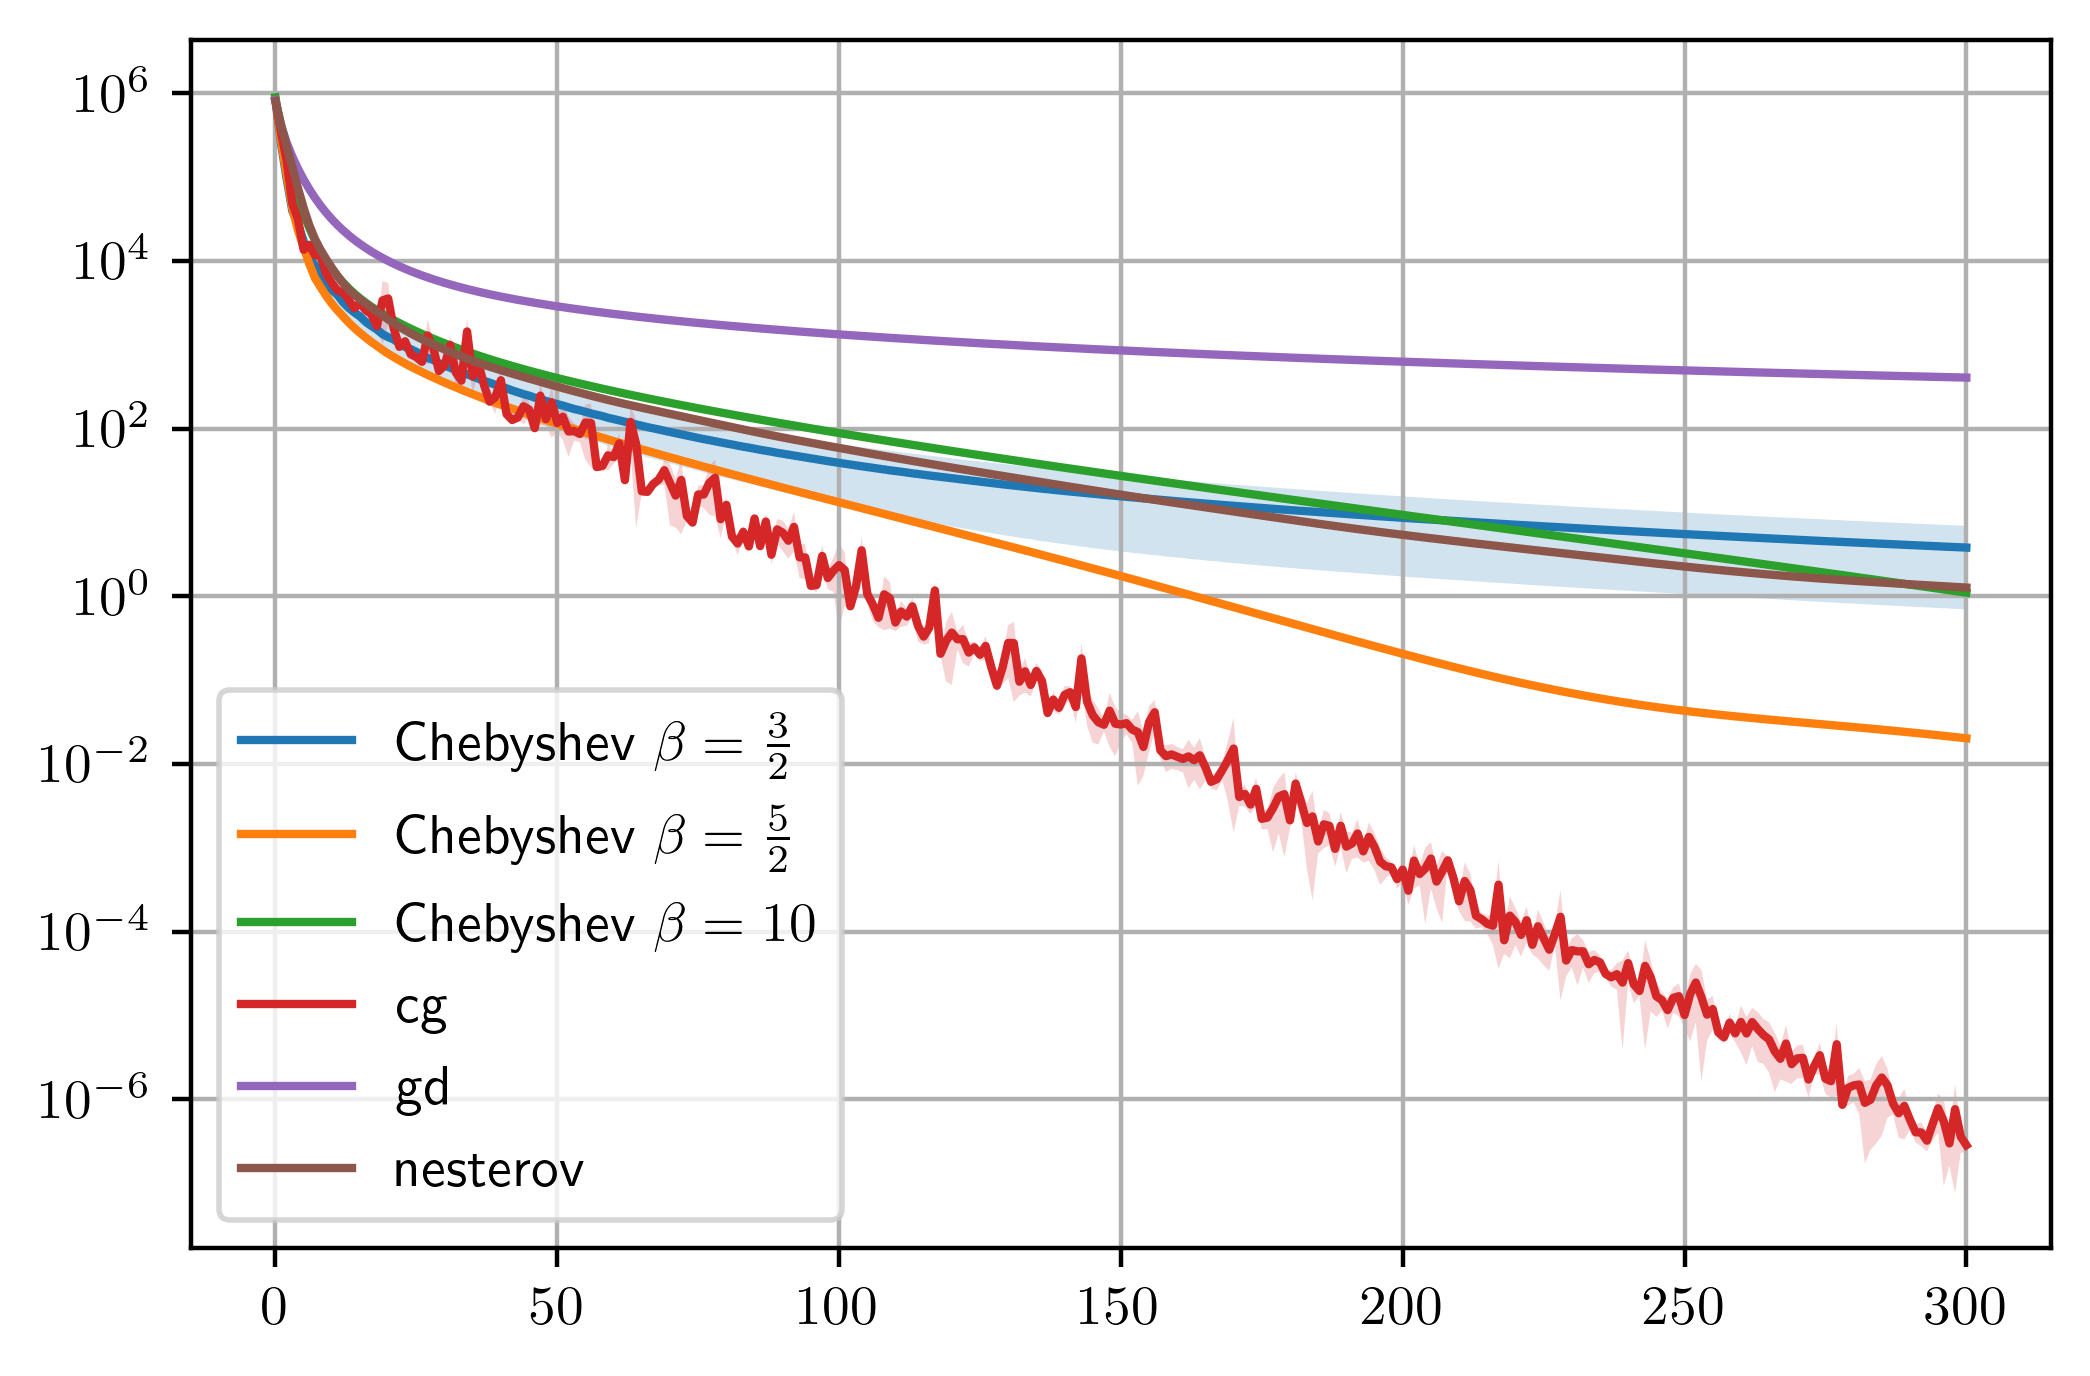

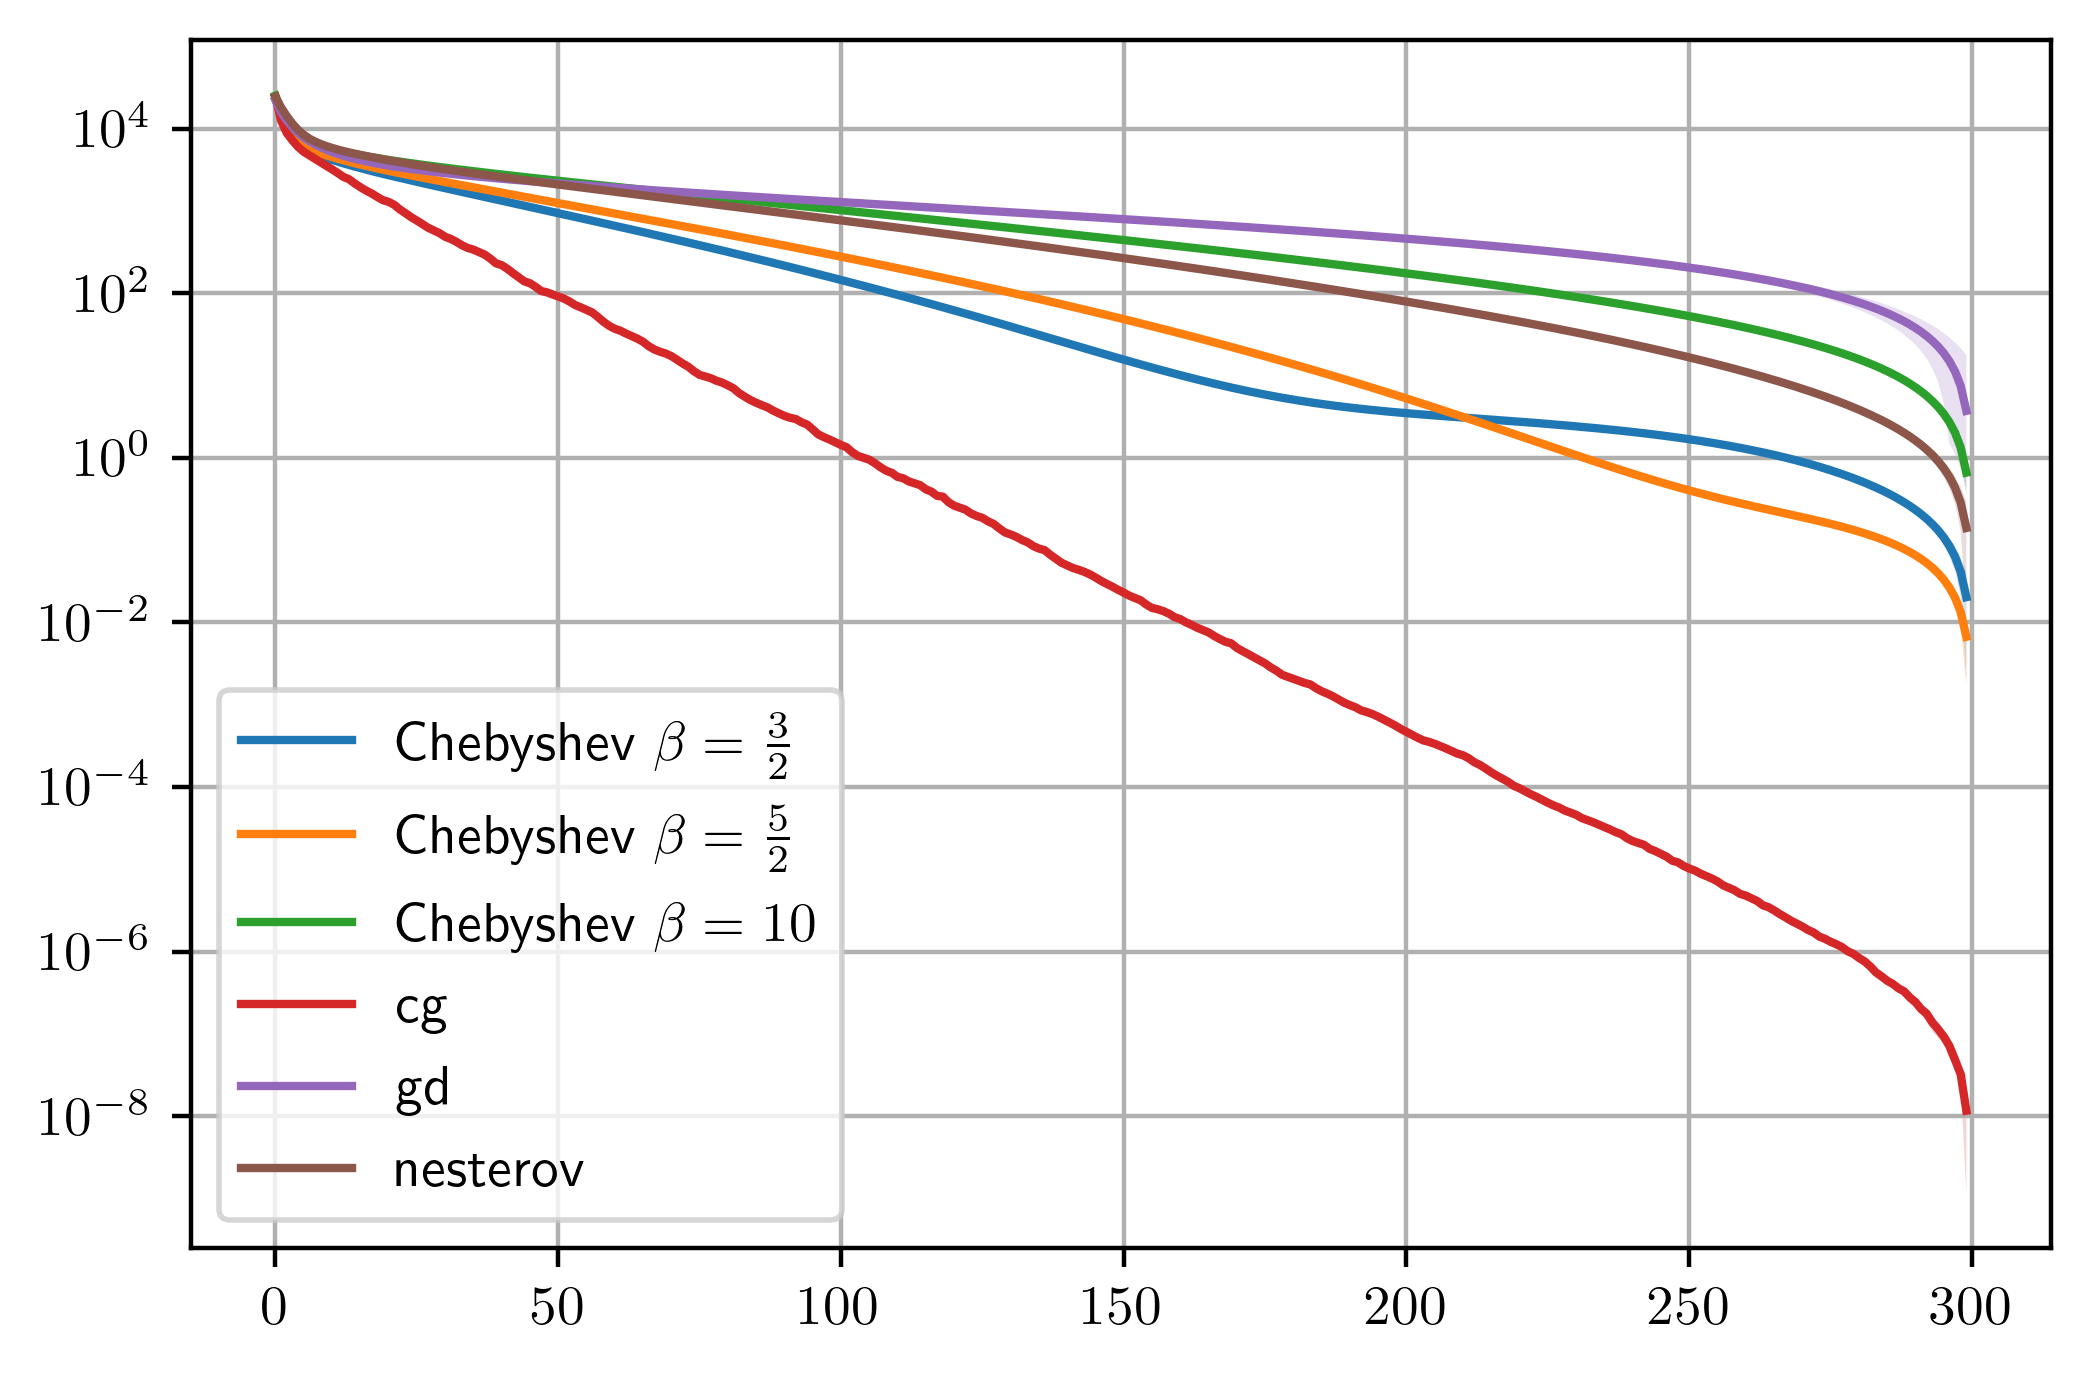

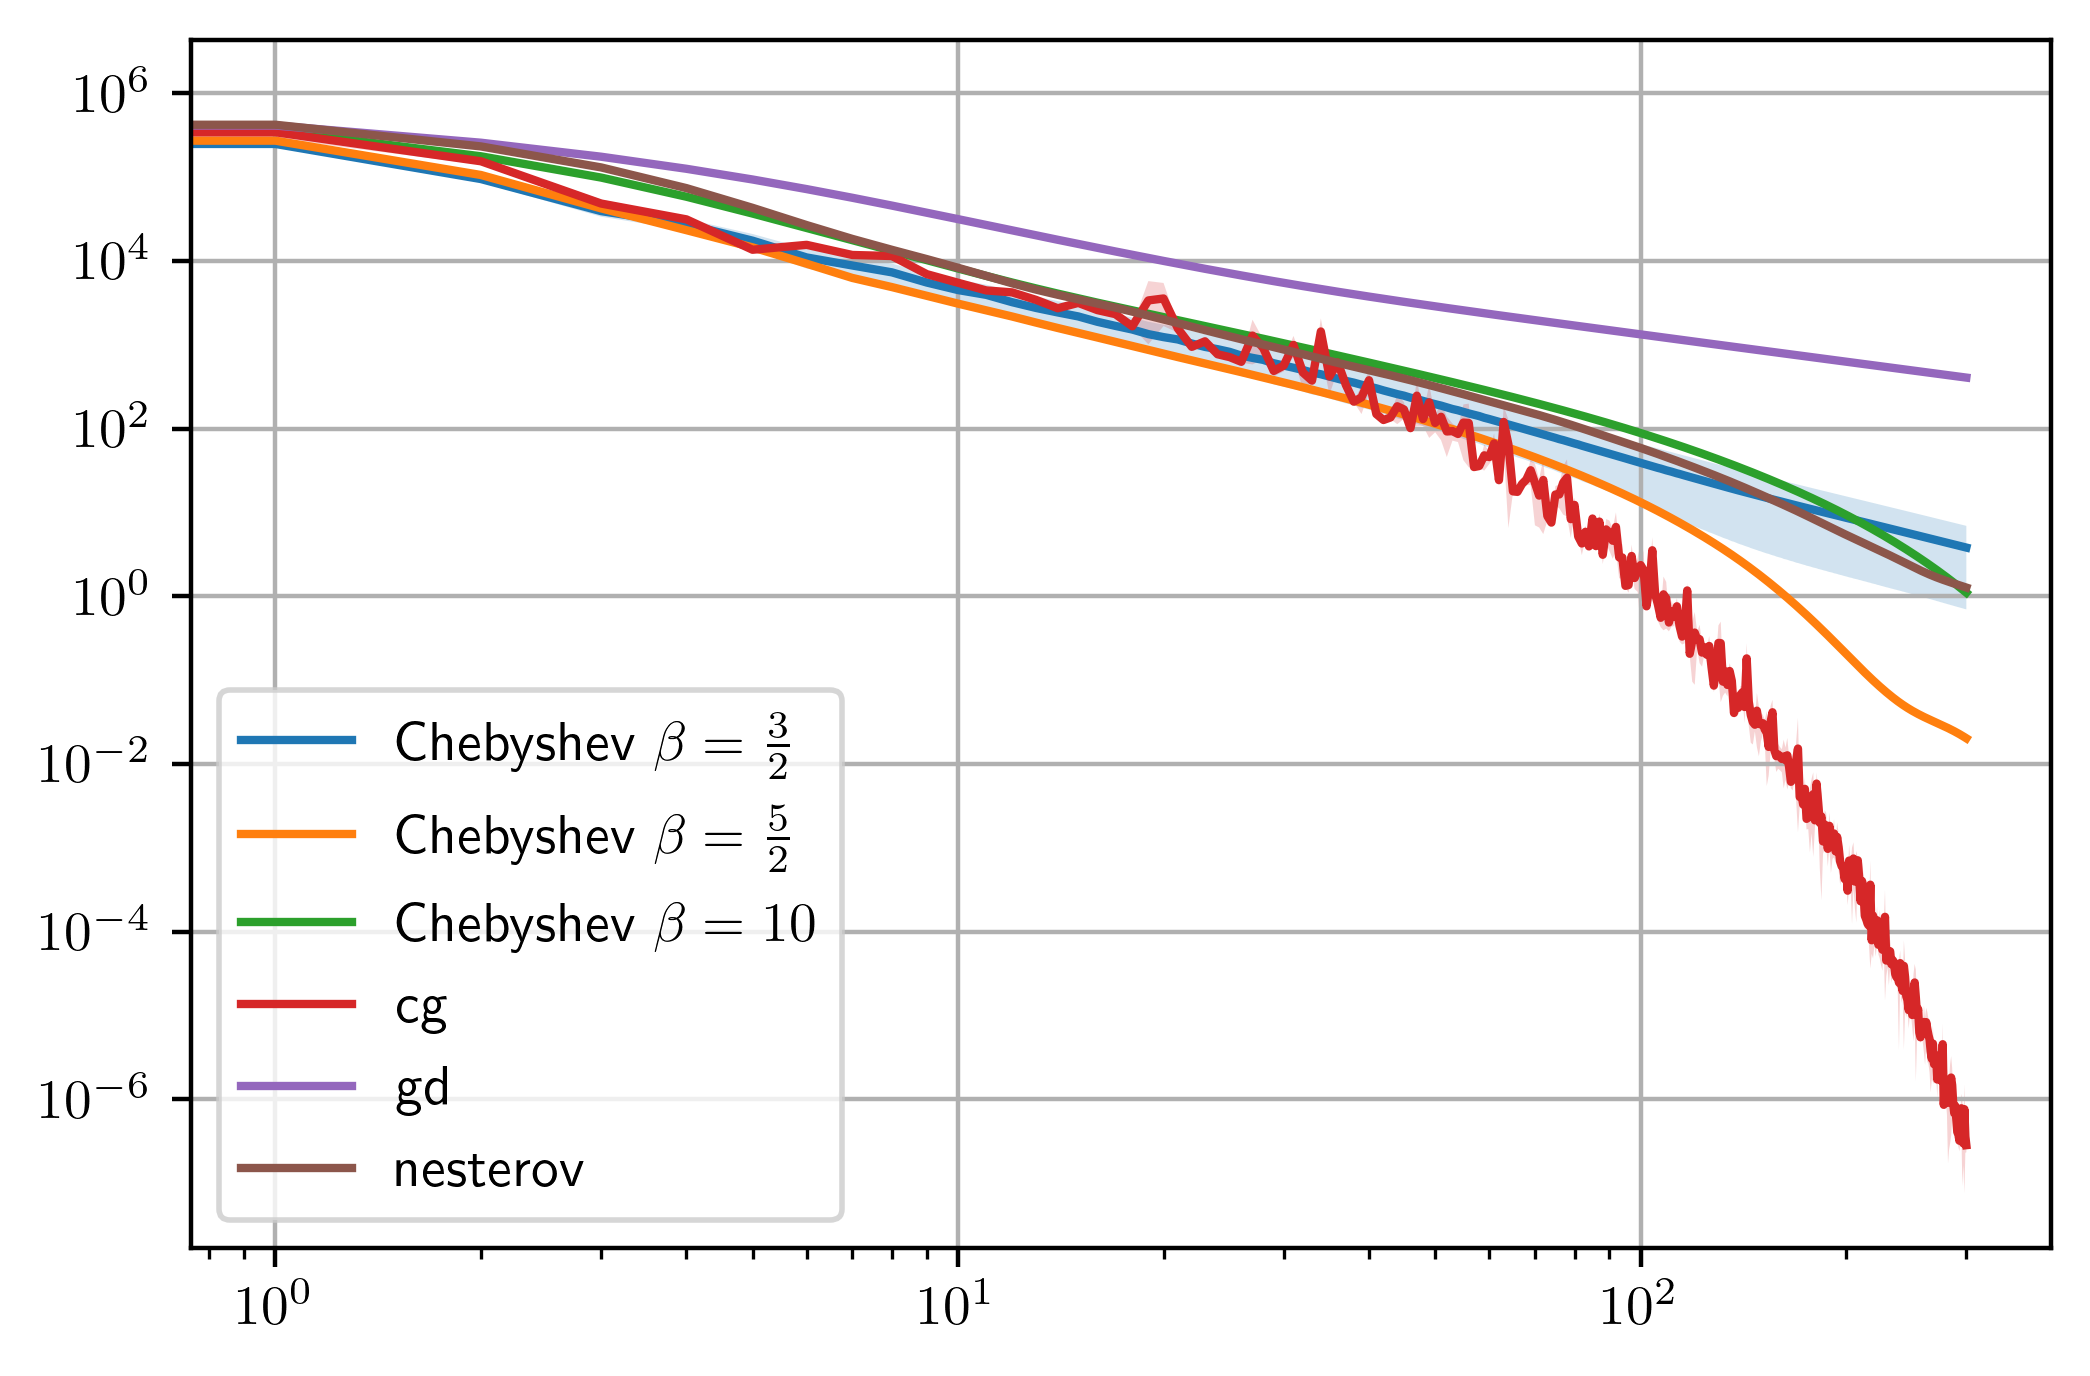

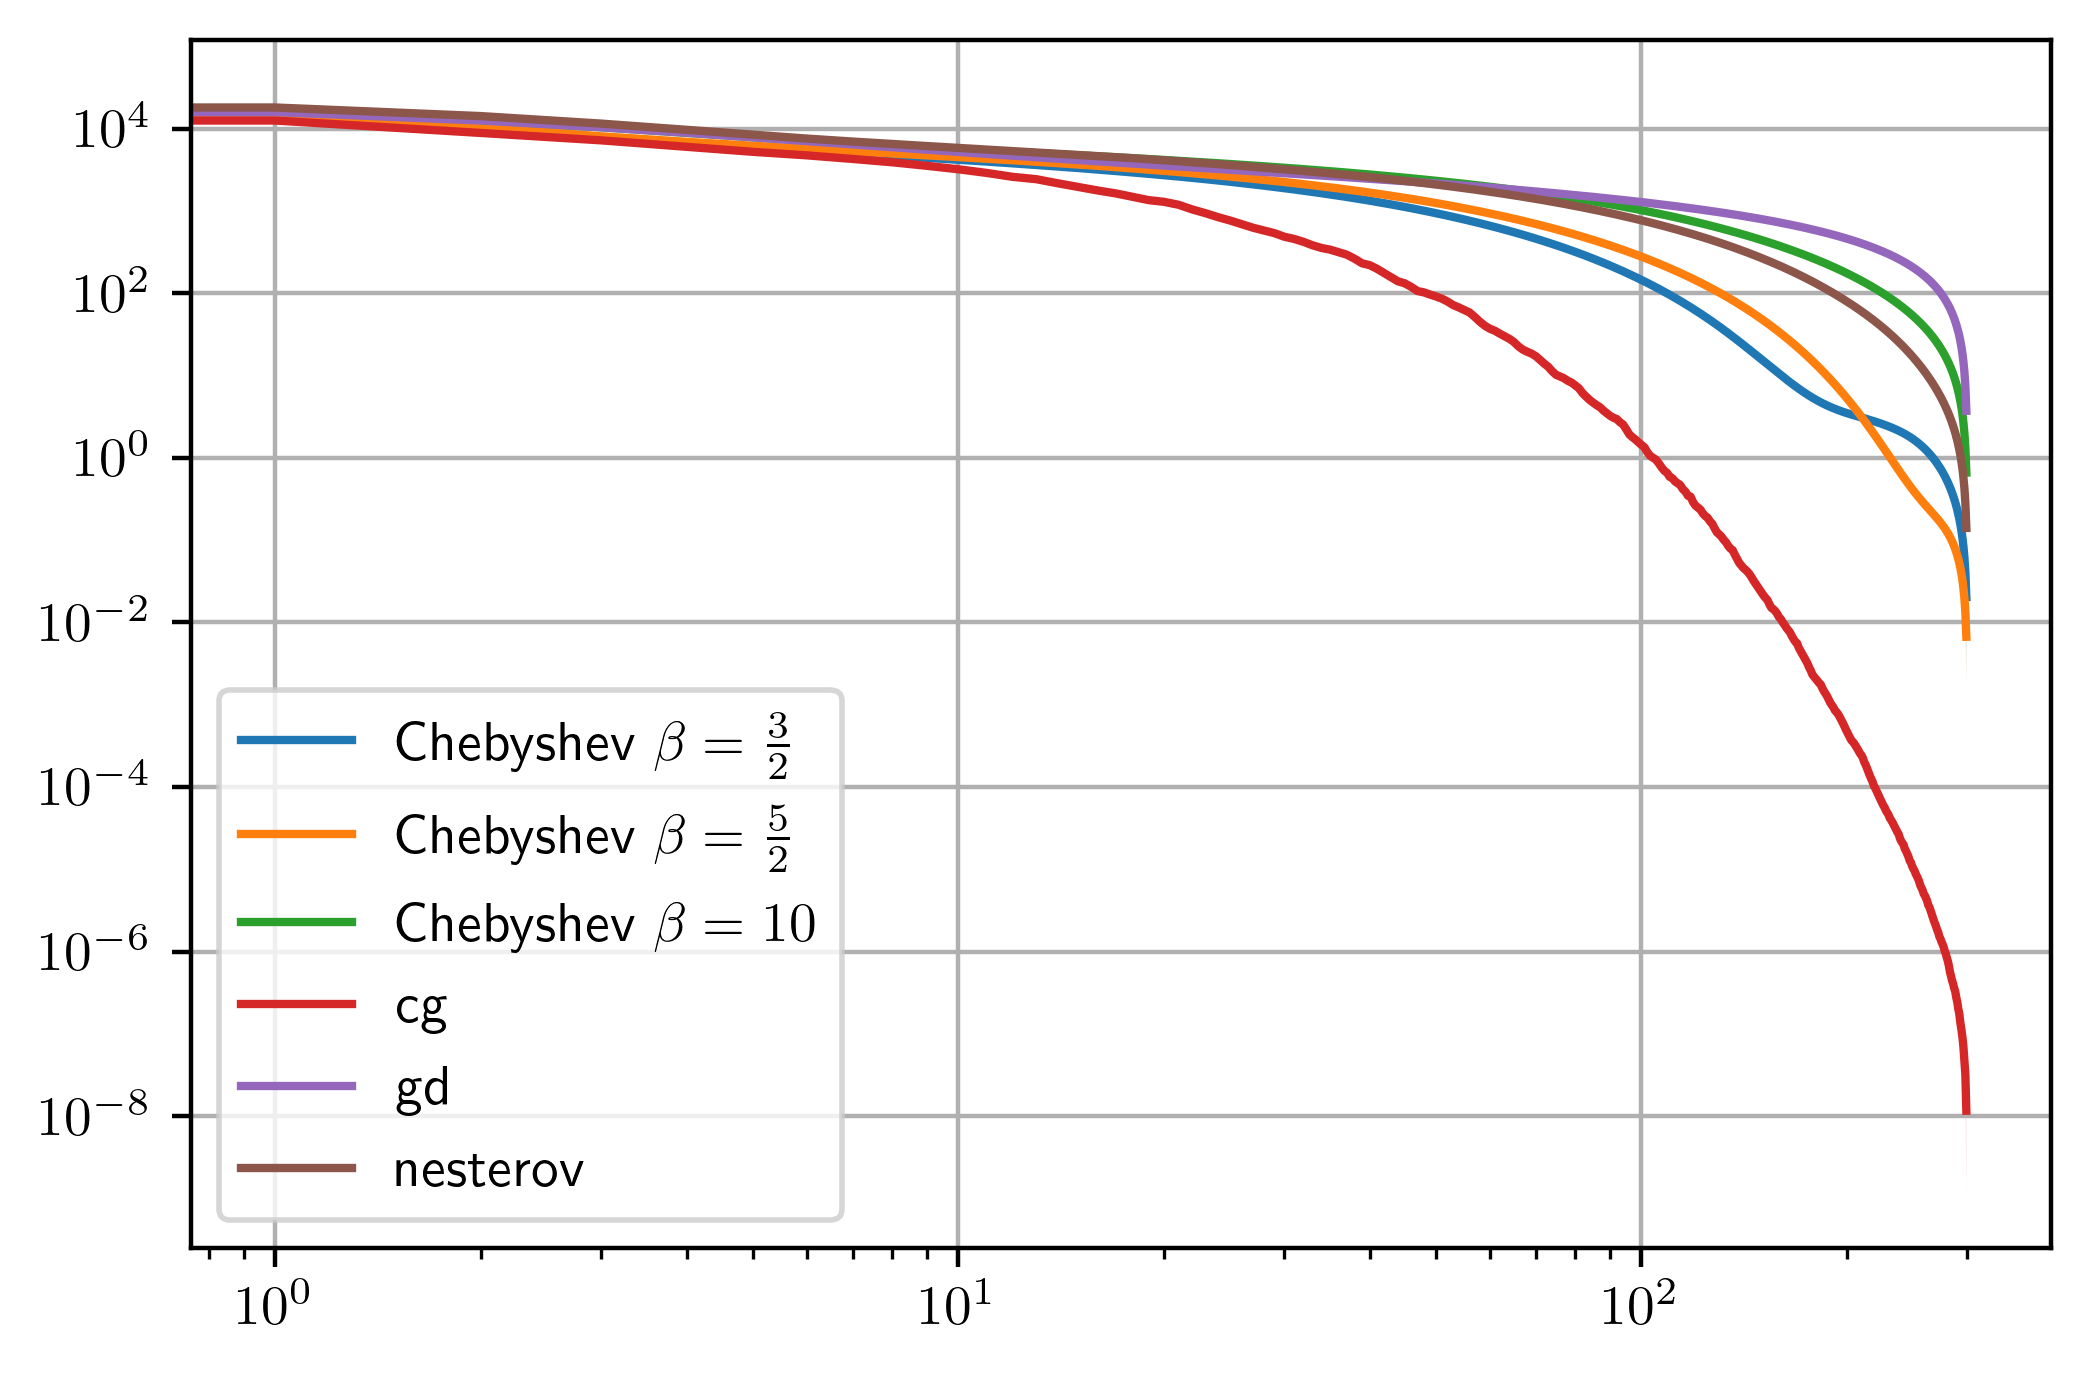

In [251]:

for check in range(2):
    for log_idx in [0,2]:

        plt.figure(dpi=400)

        for a, tag in zip(logs[:-1],tags[:-1]):
            
            #a=np.log10(a)1
            a=a[:,:,:1000]
            
            m,std=a.mean(0),a.std(0)
            if log_idx==2:
                m=m[:,:-1]-m[log_idx].min()
                std=std[:,:-1]
                print(m.shape,std.shape)
            plt.fill_between(np.arange(m.shape[-1]),np.maximum((m-std)[log_idx],0.1*m[log_idx]),(m+std)[log_idx],alpha=0.2)
            #plt.fill_between(np.arange(len(m[log_idx])),a.min(0)[log_idx],a.max(0)[log_idx],alpha=0.2)

            plt.plot(m[log_idx],label=tag)
        plt.yscale('log')

        if check:                   
            plt.xscale('log')
        plt.grid()
        plt.legend()
        


## MNIST

[[-1.97967003]]
[[-2.6910751]]
[[-2.62583916]]
[[-1.90739817]]
[[-1.34252721]]
[[-2.62062611]]
[[-0.02029388]]


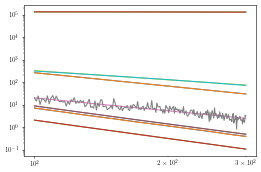

In [246]:
import sklearn
begin_idx=100
plt.figure(dpi=50)
for l in logs:
    m=l[:,0,begin_idx:].mean(0)
    model=sklearn.linear_model.LinearRegression()
    logx=np.log(np.arange(begin_idx,301).astype(float))
    model.fit(logx[:,None],np.log(m)[:,None])
    plt.plot(np.exp(logx),np.exp(model.predict(logx[:,None])))
    plt.plot(np.exp(logx),m)
    plt.xscale('log')
    plt.yscale('log')
    print(model.coef_)


##Higher values of a indeed speedup performance

(3, 300) (3, 300)
(3, 300) (3, 300)
(3, 300) (3, 300)
(3, 300) (3, 300)
(3, 300) (3, 300)
(3, 300) (3, 300)
(3, 300) (3, 300)
(3, 300) (3, 300)
(3, 300) (3, 300)
(3, 300) (3, 300)
(3, 300) (3, 300)
(3, 300) (3, 300)


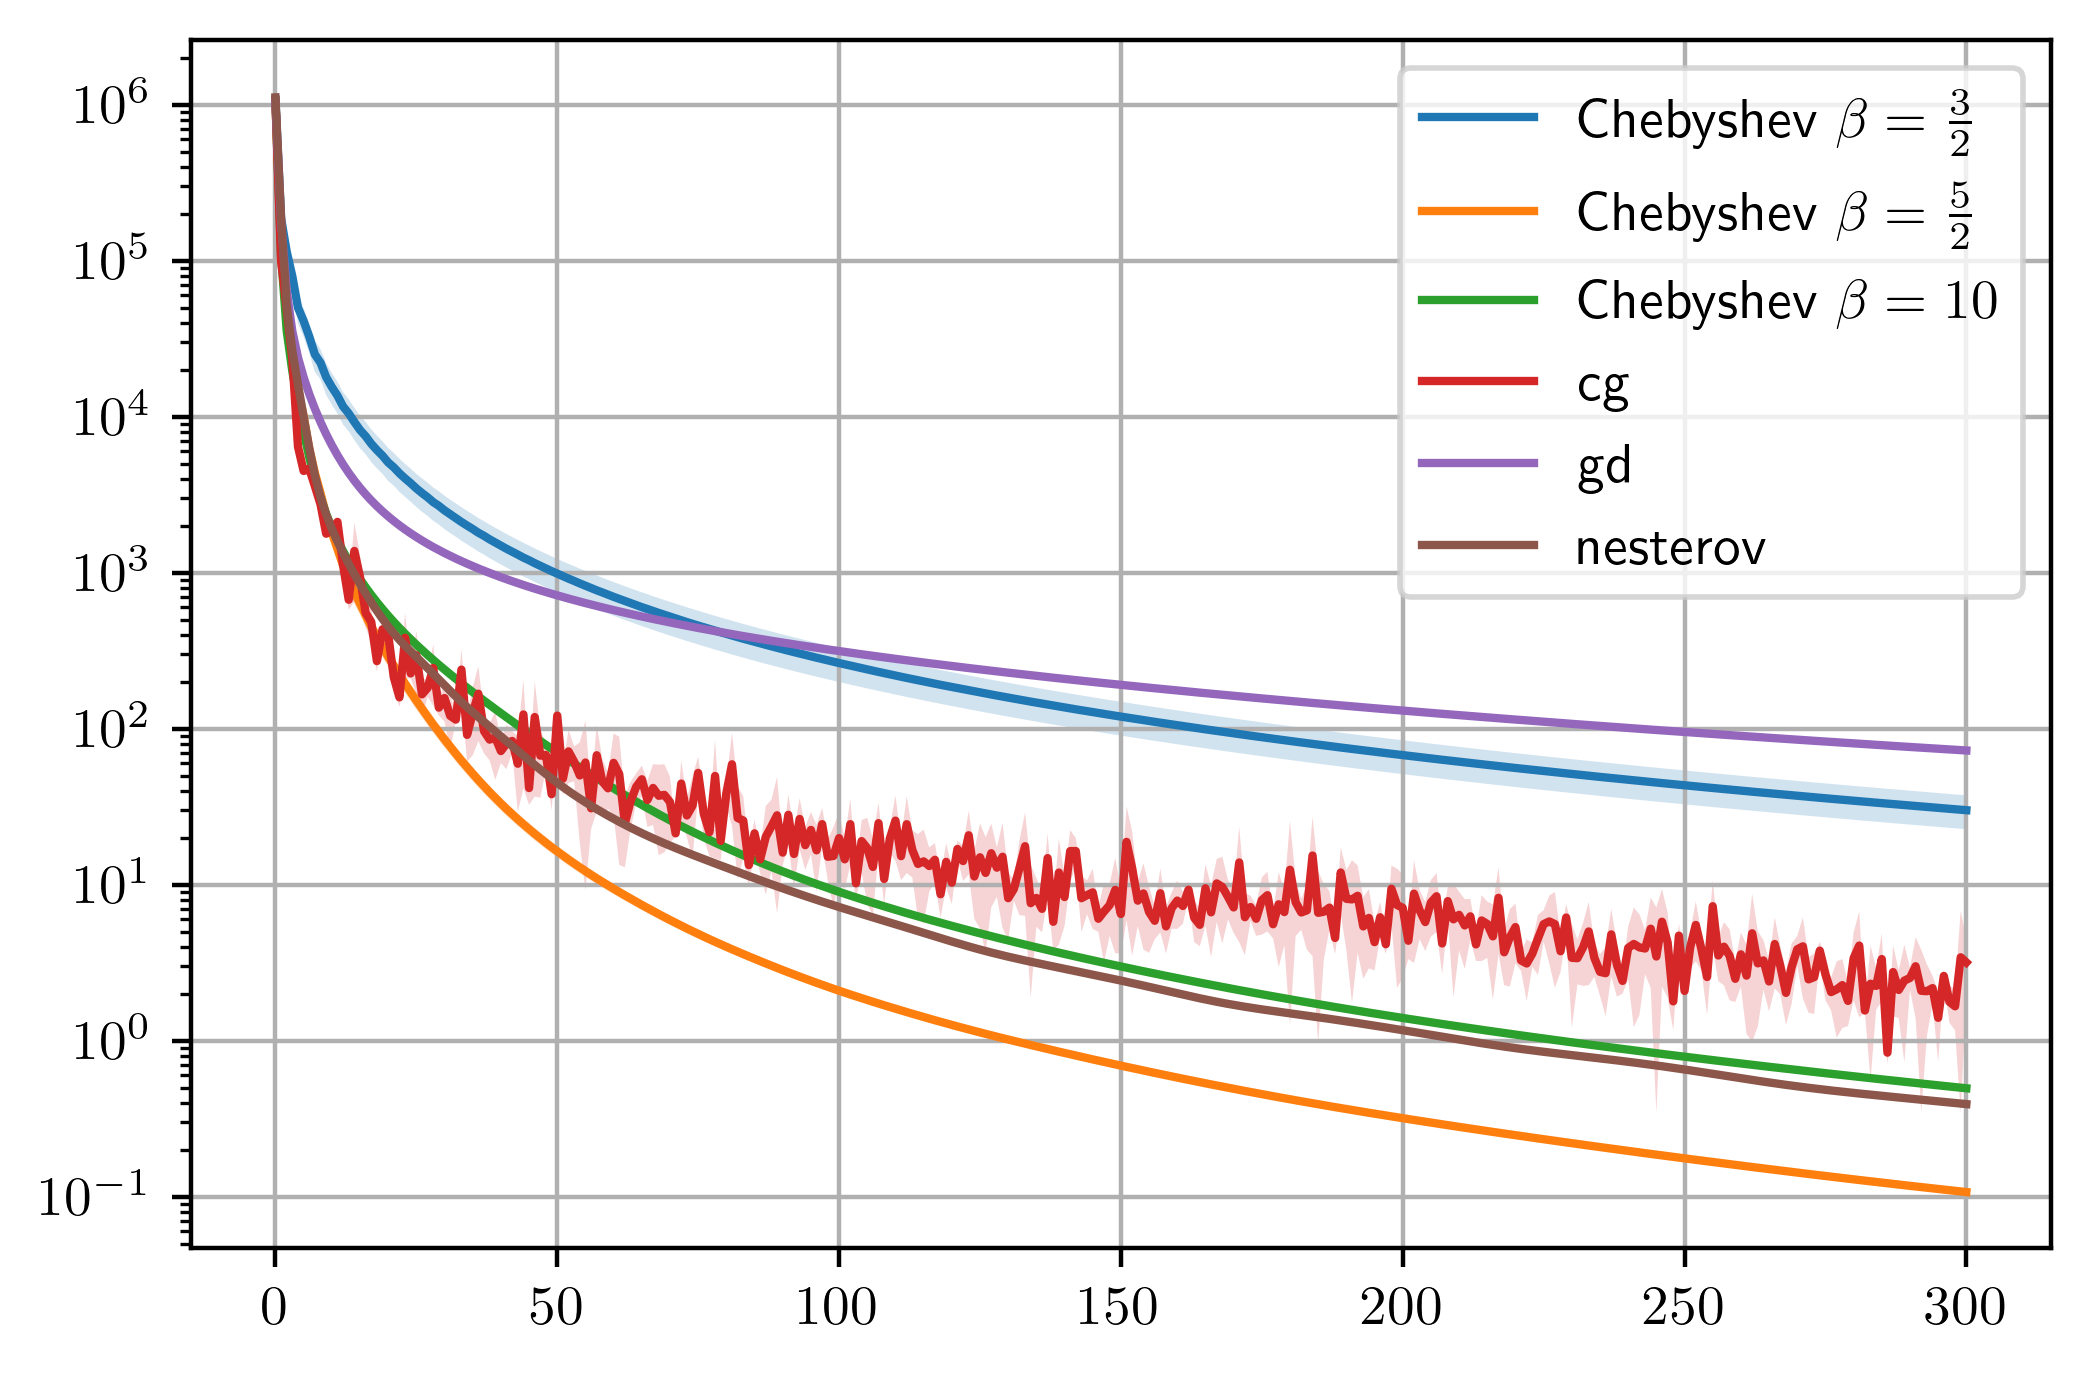

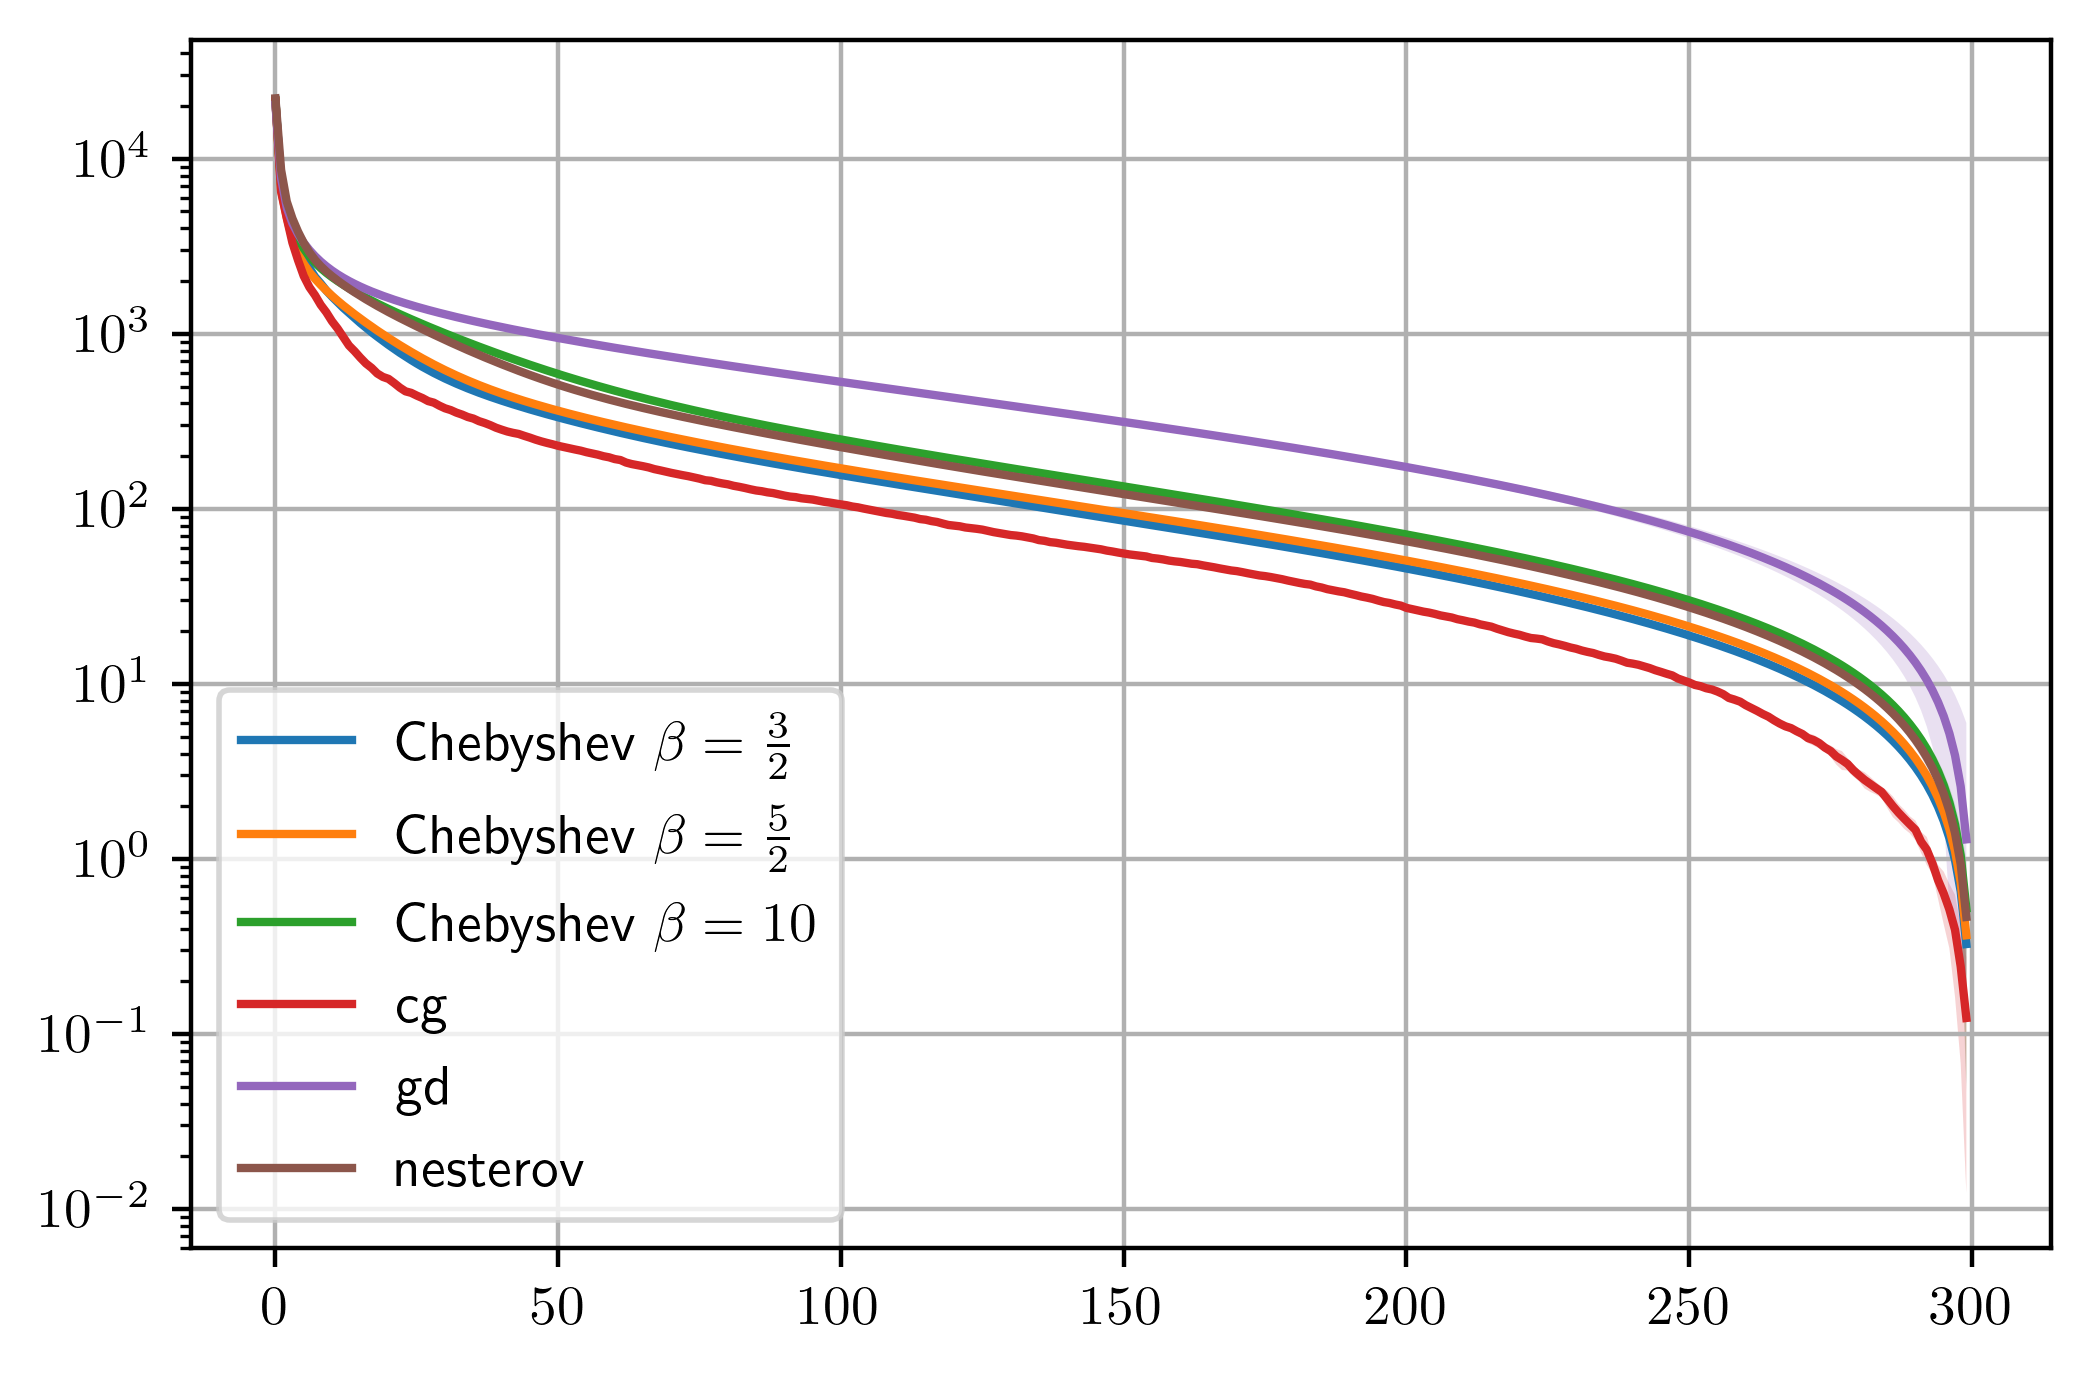

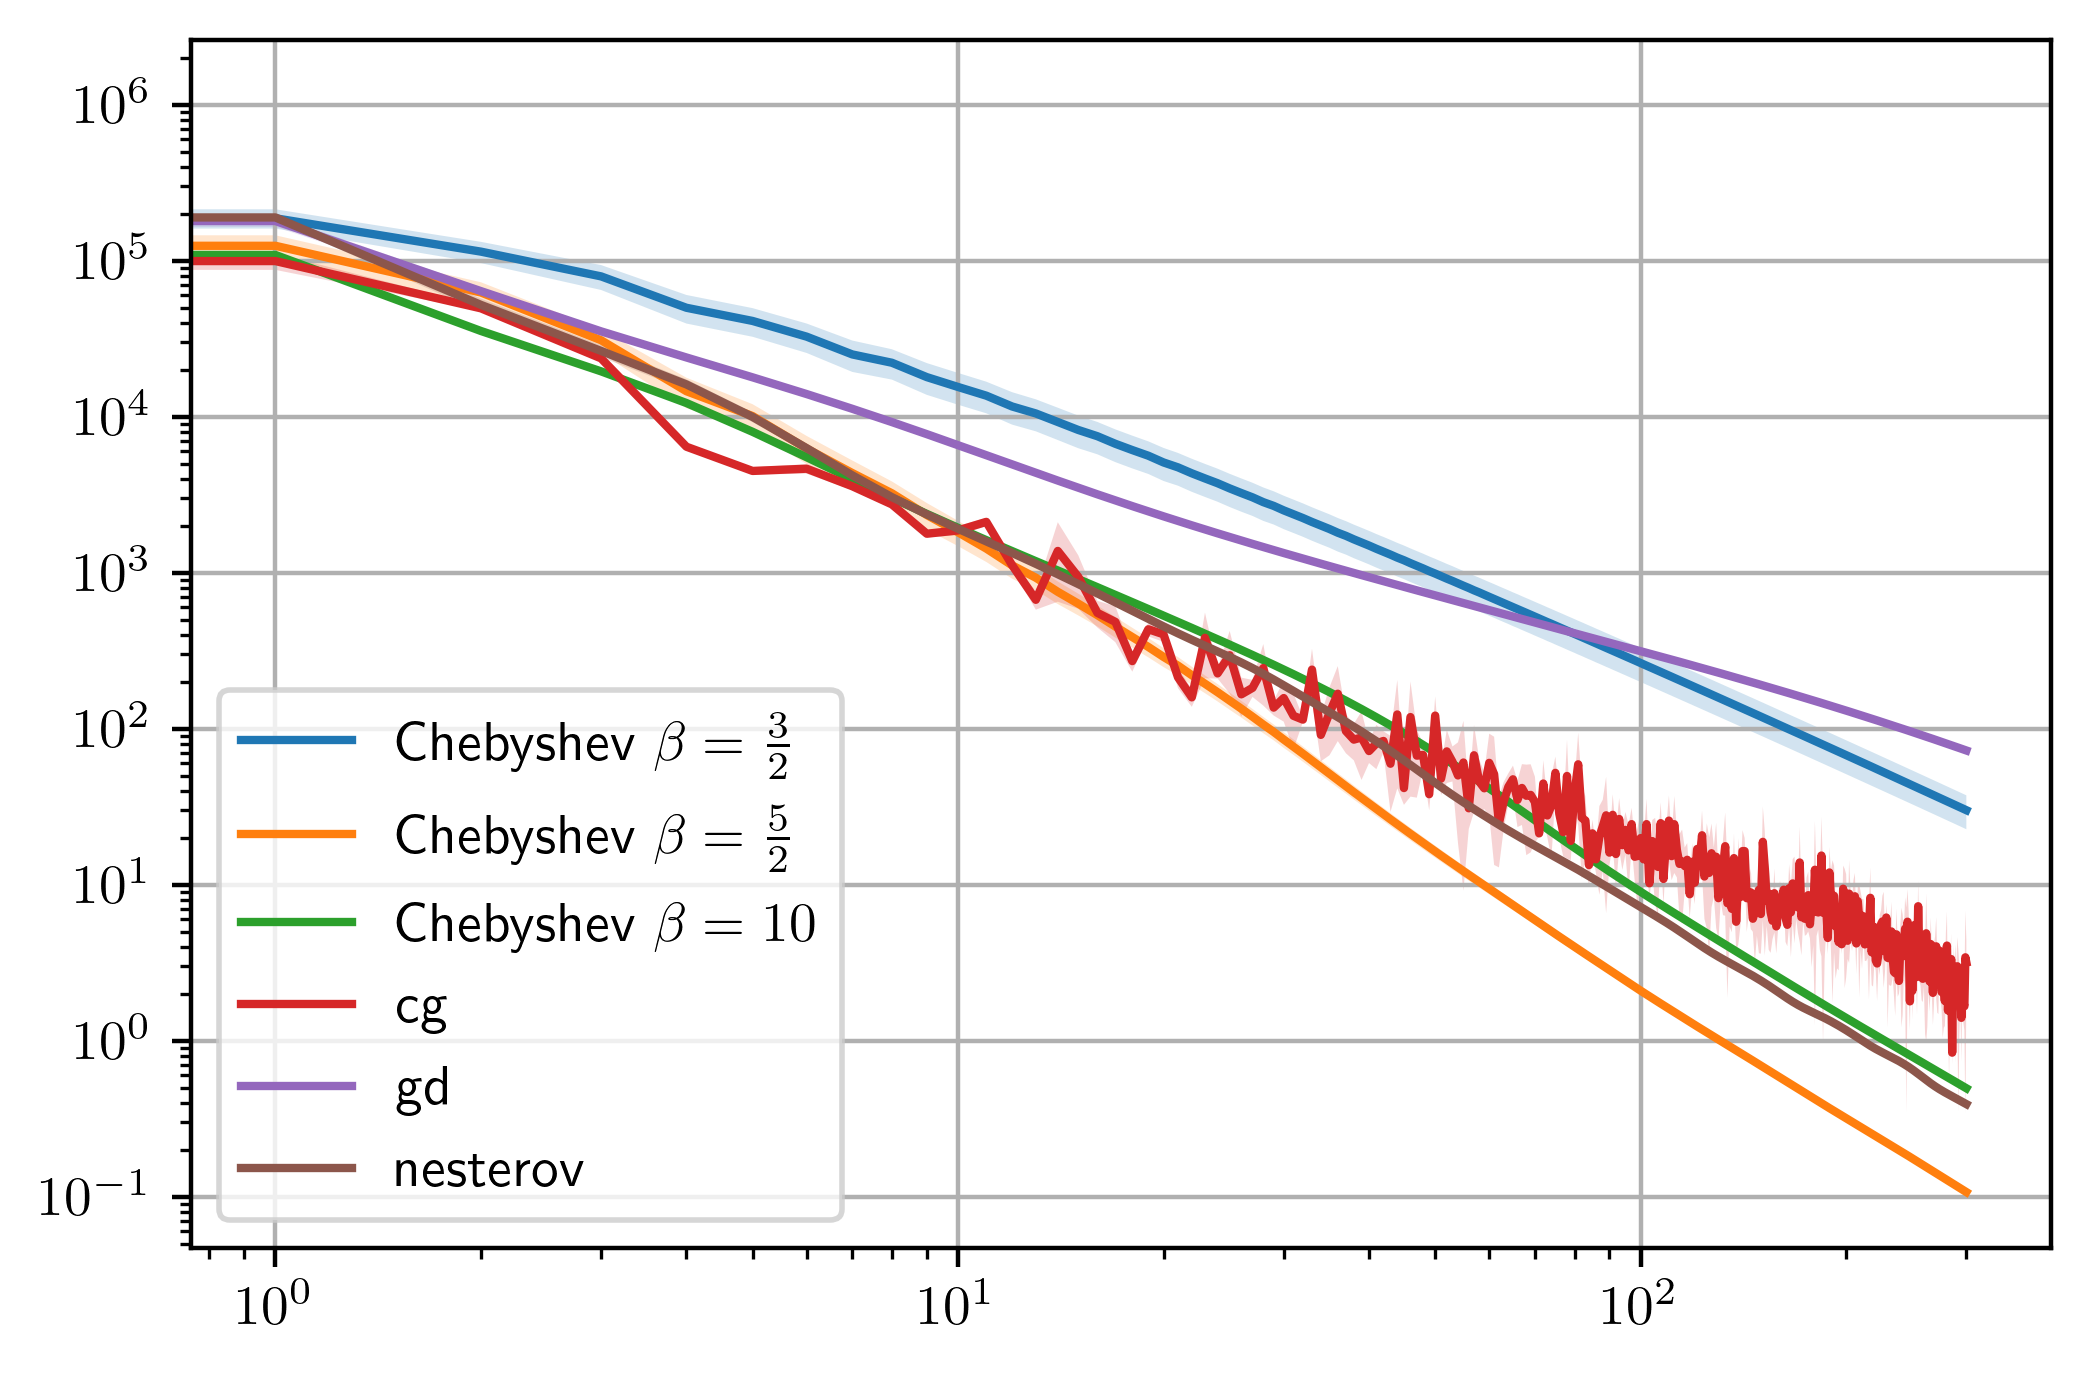

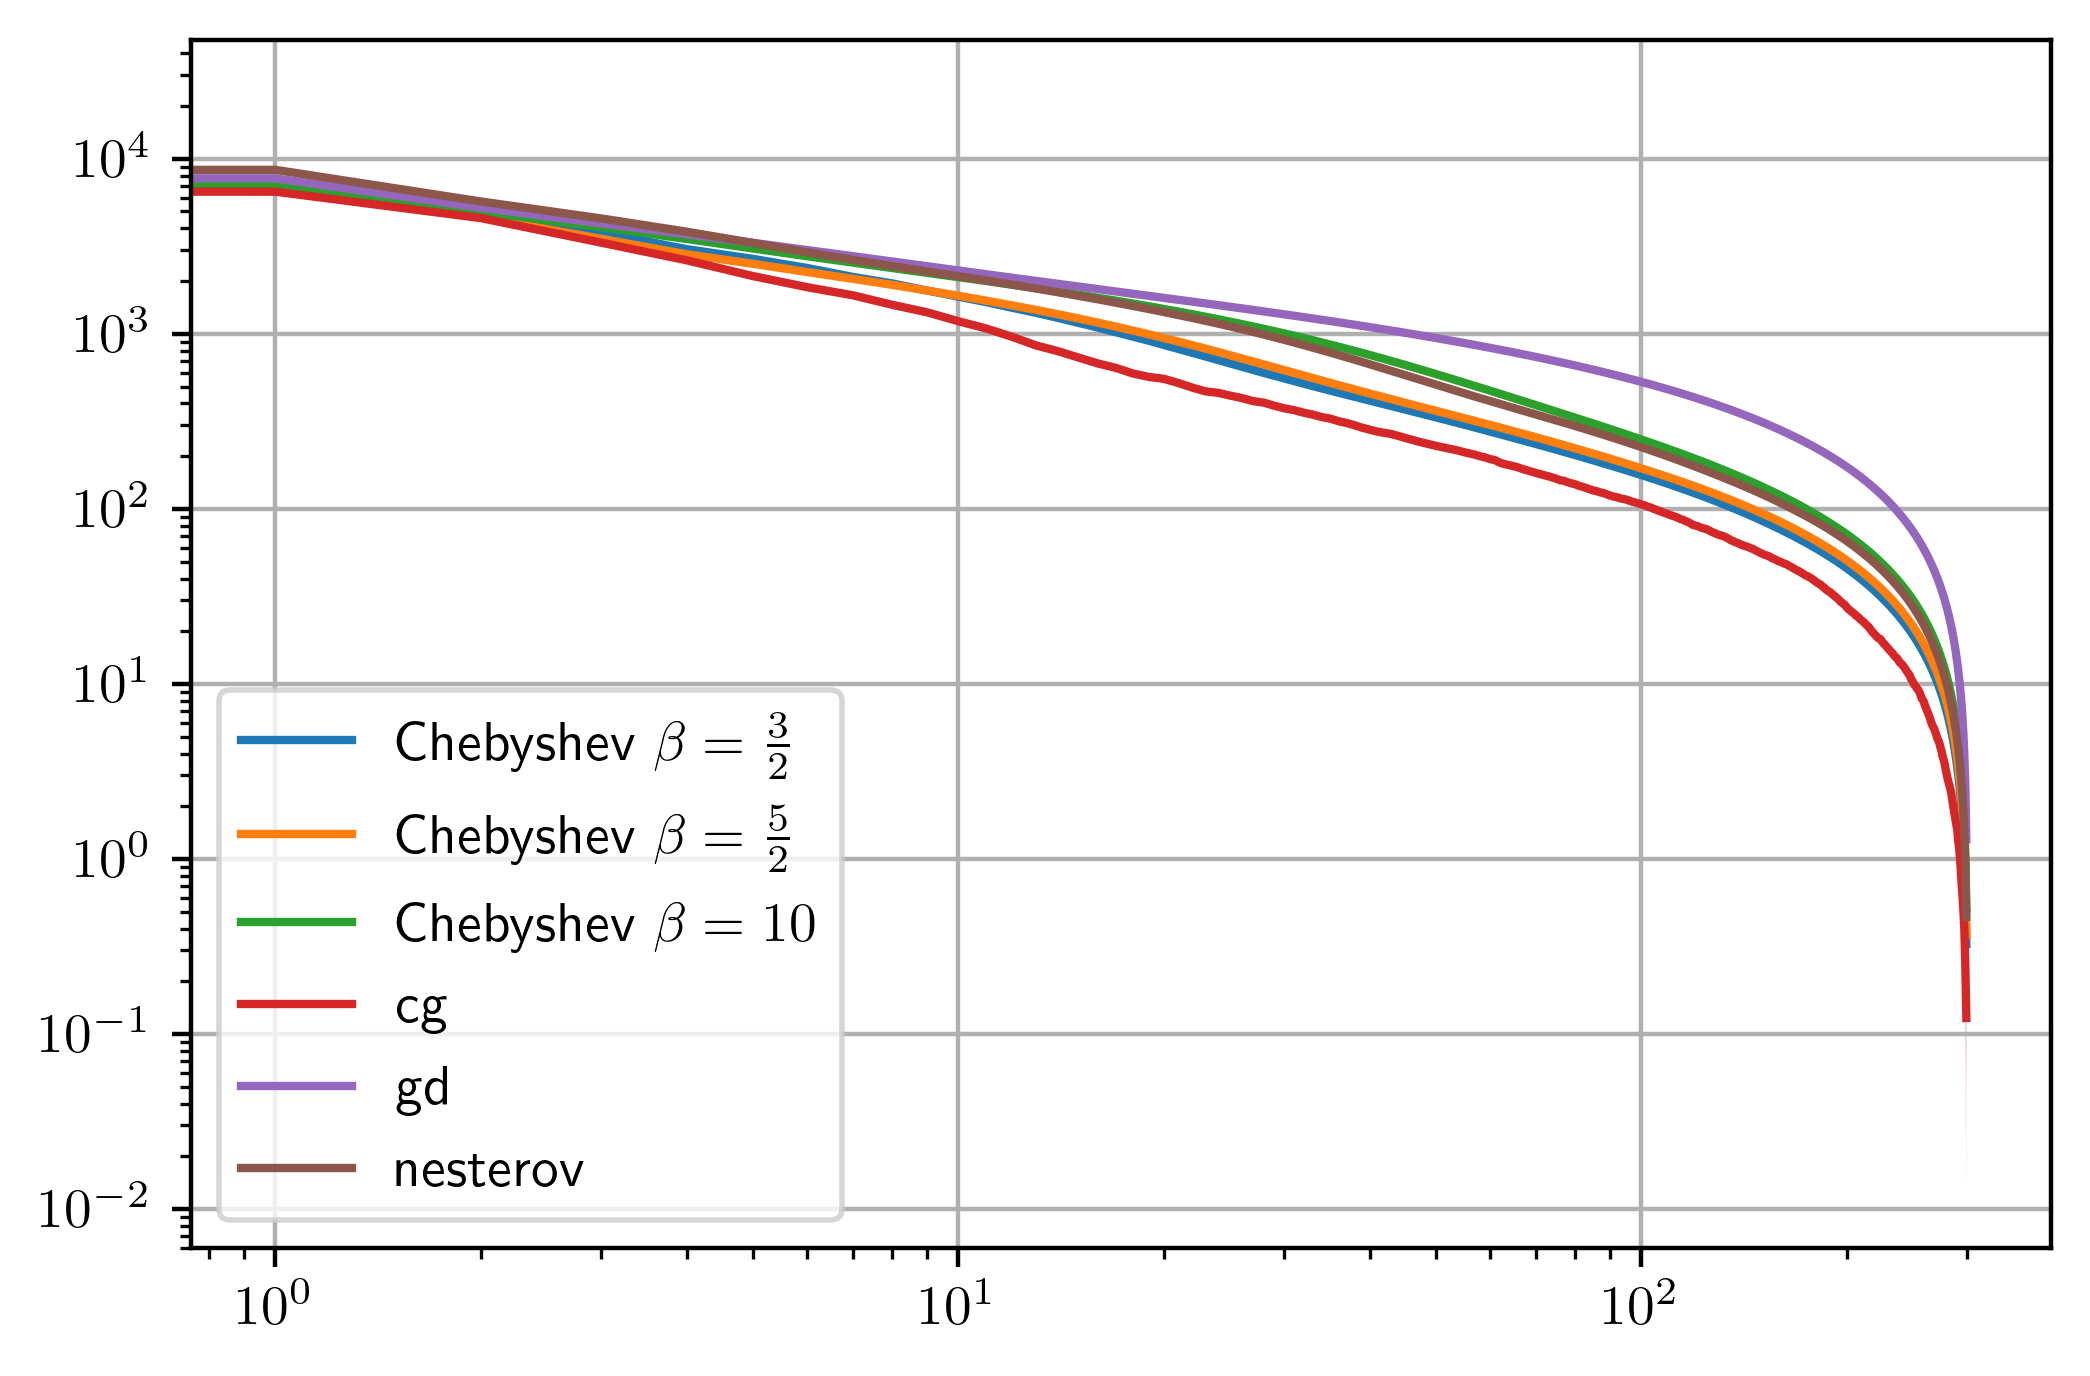

In [244]:

for check in range(2):
    for log_idx in [0,2]:

        plt.figure(dpi=400)

        for a, tag in zip(logs[:-1],tags[:-1]):
            
            #a=np.log10(a)1
            a=a[:,:,:1000]
            
            m,std=a.mean(0),a.std(0)
            if log_idx==2:
                m=m[:,:-1]-m[log_idx].min()
                std=std[:,:-1]
                print(m.shape,std.shape)
            plt.fill_between(np.arange(m.shape[-1]),np.maximum((m-std)[log_idx],0.1*m[log_idx]),(m+std)[log_idx],alpha=0.2)
            #plt.fill_between(np.arange(len(m[log_idx])),a.min(0)[log_idx],a.max(0)[log_idx],alpha=0.2)

            plt.plot(m[log_idx],label=tag)
        plt.yscale('log')

        if check:                   
            plt.xscale('log')
        plt.grid()
        plt.legend()
        


NEsterov vs Chebyshev performance at variable $\xi$

In [ ]:
##Let's check if the performance of the Jacobi method is stable wrt the behaviour of the distribution near the biggest eigenvalue

nestelogs=[]
beta_logs=[]

for a in [0.5,1,4,5]:
    log1=[]
    log2=[]
    for _ in range(10):
        f=BetaQuadratic(a=a,b=3/2)
        log1.append(jacobi_momentum(f,L=f.L,alpha=1/2,beta=6,niter=500)[0].to_numpy()[0])
        log2.append(nesterov(f,L=f.L,niter=500)[0].to_numpy()[0])
    
    log1=np.stack(log1)
    log2=np.stack(log2)
    
    beta_logs.append(log1)
    
    nestelogs.append(log2)

[[-10.82017475]]
[[-10.8319002]]


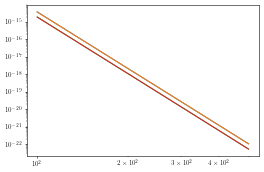

In [212]:
import sklearn
begin_idx=100
plt.figure(dpi=50)
l=beta_logs[-1]
for log_idx in [0,2]:
    m=l[:,log_idx,begin_idx:].mean(0)
    model=sklearn.linear_model.LinearRegression()
    logx=np.log(np.arange(begin_idx,501).astype(float))
    model.fit(logx[:,None],np.log(m)[:,None])
    plt.plot(np.exp(logx),np.exp(model.predict(logx[:,None])))
    plt.plot(np.exp(logx),m)
    plt.xscale('log')
    plt.yscale('log')
    print(model.coef_)


##Higher values of a indeed speedup performance

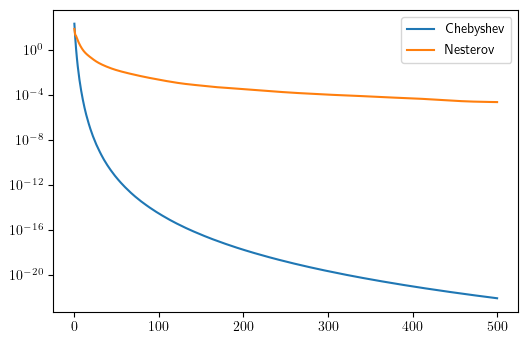

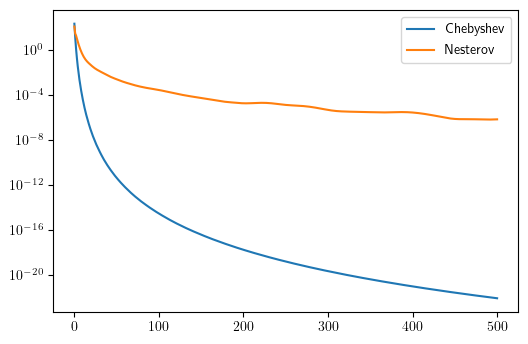

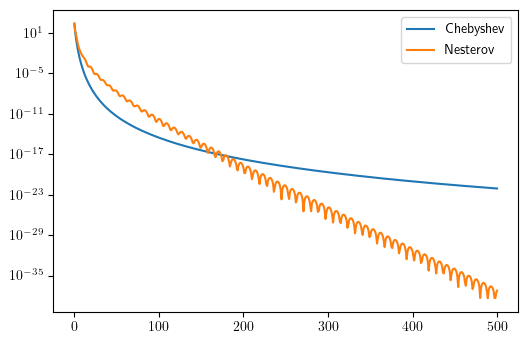

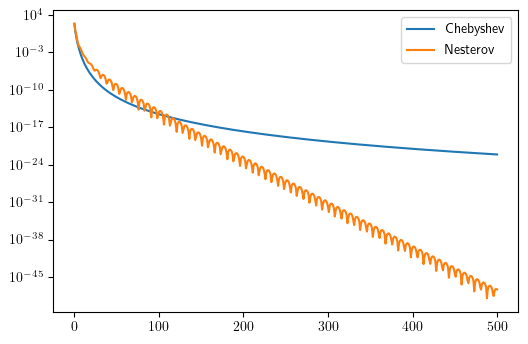

In [220]:
log_idx=0
for log1,log2,a in zip(beta_logs,nestelogs,[0.5,1,4,5]):
    plt.figure(dpi=100)
    #plt.fill_between(np.arange(log.shape[-1]),log.min(0)[log_idx],log.max(0)[log_idx],alpha=0.2,color='b',label='a='+str(a))
    #plt.plot(mp_logs.mean(0)[log_idx])
    #plt.fill_between(np.arange(mp_logs.shape[-1]),mp_logs.min(0)[log_idx],mp_logs.max(0)[log_idx],alpha=0.2,color='r')
    plt.plot(log.mean(0)[2],label='Chebyshev')
    plt.plot(log2.mean(0)[2],label='Nesterov')
    #plt.set_title('a='+str(a))
    
    plt.yscale('log')
    #plt.xscale('log')
    plt.legend()

##For high values of a, nesterov seem to be able to exploit the practically strong convexity: It has linear convergence